# Make Figures for Main Manuscript

Lauren Khoury and Kendra Wyant  
January 9, 2026

In [ ]:

library(dplyr) |> suppressMessages()
library(skimr)


In [ ]:

d_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_0.csv"))
# d_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_03.csv"))
d_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_05.csv"))

d_20_covs <- data.table::fread(here::here(rdrive_path, "batch_results_20_covs.csv"))
d_n50 <- data.table::fread(here::here(rdrive_path, "batch_results_n50.csv"))

d2_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_0.csv"))
# d2_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_03.csv"))
d2_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_05.csv"))

d_wo_x_0 <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_seed0.csv"))
d_wo_x_1 <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_seed1.csv"))

d_02_0 <- data.table::fread(here::here(rdrive_path, "batch_results_02_seed0.csv"))
d_02_1 <- data.table::fread(here::here(rdrive_path, "batch_results_02_seed1.csv"))


In [ ]:

d_0 <- rbind(d_0, d_20_covs |> filter(b_x == 0))
d_0 <- rbind(d_0, d_n50 |> filter(b_x == 0))

d_05 <- rbind(d_05, d_20_covs |> filter(b_x == 0.5))
d_05 <- rbind(d_05, d_n50 |> filter(b_x == 0.5))

rm(d_20_covs, d_n50)

d_0 <- rbind(d_0, d2_0)
d_05 <- rbind(d_05, d2_05)

rm(d2_0, d2_05)

d_0 <- rbind(d_0, d_wo_x_0 |> filter(b_x == 0))
d_0 <- rbind(d_0, d_wo_x_1 |> filter(b_x == 0))

d_05 <- rbind(d_05, d_wo_x_0 |> filter(b_x == 0.5))
d_05 <- rbind(d_05, d_wo_x_1 |> filter(b_x == 0.5))

rm(d_wo_x_0, d_wo_x_1)

d_02 <- rbind(d_02_0, d_02_1)

rm(d_02_0, d_02_1)


In [ ]:

d_0 <- d_0 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs","p_hacked",  "r",
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c("No covariates", "All covariates", "p-hacking", 
                                    "Single covariate lm", "Single covariate lm with X", 
                                    "All covariates lm", "All covariates lm with X", 
                                            "All covariates LASSO", "All covariates LASSO with X")))

d_02 <- d_02 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs","p_hacked",   "r", 
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c( "No covariates", "All covariates", "p-hacking", 
                                    "Single covariate lm", "Single covariate lm with X", 
                                    "All covariates lm", "All covariates lm with X", 
                                            "All covariates LASSO", "All covariates LASSO with X")))

d_05 <- d_05 |> 
  mutate(method = factor(method, levels = c("no_covs", "all_covs","p_hacked",   "r", 
                                            "partial_r", "full_lm_wo_x", "full_lm",  
                                           "lasso_wo_x", "lasso"),
                         labels = c("No covariates", "All covariates", "p-hacking", 
                                    "Single covariate lm", "Single covariate lm with X", 
                                    "All covariates lm", "All covariates lm with X", 
                                            "All covariates LASSO", "All covariates LASSO with X")))


In [ ]:
type_I_summary <- d_0 |>
  group_by(method) |>
  summarise(type_I = mean(p_value < 0.05)) |> 
  mutate(group = case_match(method,
                            "p-hacking" ~ "p-hacking",
                            "No covariates" ~ "No selection",
                            "All covariates" ~ "No selection",
                            "Single covariate lm" ~ "Single covariate lm",
                            "Single covariate lm with X" ~ "Single covariate lm",
                            "All covariates lm" ~ "All covariates lm",
                            "All covariates lm with X" ~ "All covariates lm",
                            "All covariates LASSO" ~ "All covariates LASSO",
                            "All covariates LASSO with X" ~ "All covariates LASSO"))


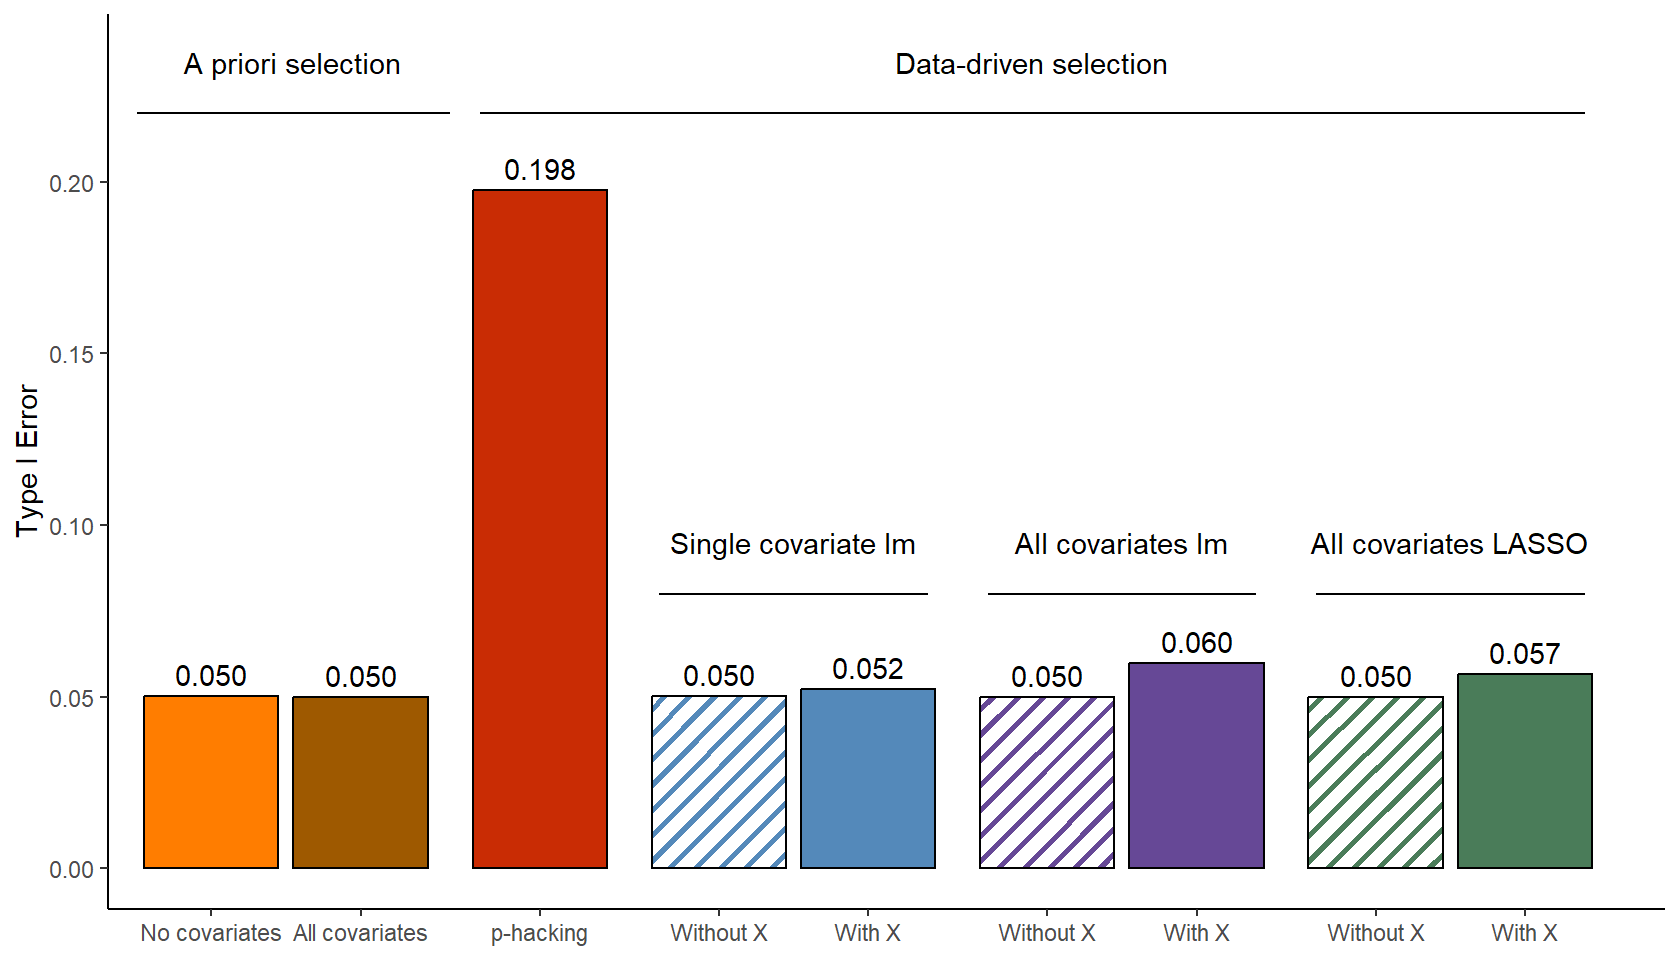

In [ ]:

# ---- Parameters
gap_after_idx <- c(2,  3, 5, 7)  
gap_size <- 0.2                
bar_width <- 0.9                


df <- type_I_summary |>
  mutate(method_chr = as.character(method))


n <- nrow(df)
base_pos <- seq_len(n)  

# compute how many gaps precede each bar
gap_count_before <- sapply(base_pos, function(i) sum(gap_after_idx < i))
# add the total gap length before each bar
x_pos <- base_pos + gap_count_before * gap_size

plot_df <- df |>
  mutate(x_pos = x_pos)


x_breaks <- plot_df$x_pos
x_labels <- c("No covariates", "All covariates", "p-hacking", 
              "Without X", "With X",
              "Without X", "With X",
              "Without X", "With X")

segment_labels <- tibble::tibble(
  x = c(mean(c(0.5, 2.6)),
        mean(c(2.8, 10.2)),
        mean(c(4.0, 5.8)),
        mean(c(6.2, 8.0)),
        mean(c(8.4, 10.2))),
  y = c(.22, .22, .08, .08, .08) + 0.015,   
  label = c("A priori selection", "Data-driven selection", "Single covariate lm", "All covariates lm", "All covariates LASSO")
)

ggplot(
  plot_df,
  aes(x = x_pos, y = type_I, fill = method, pattern = method)
) +
  geom_bar_pattern(
    stat = "identity",
    width = bar_width,
    pattern_colour = "white",
    pattern_fill = "white",
    pattern_angle = 45,
    pattern_density = 0.6,
    pattern_spacing = 0.02,
    color = "black"
  ) +
  geom_segment(aes(y = .22, x = .5, xend = 2.6)) +
  geom_segment(aes(y = .22, x = 2.8, xend = 10.2)) +
  geom_segment(aes(y = .08, x = 4.0, xend = 5.8)) +
  geom_segment(aes(y = .08, x = 6.2, xend = 8.0)) +
  geom_segment(aes(y = .08, x = 8.4, xend = 10.2)) +
  geom_text(
    aes(label = sprintf("%.3f", type_I)),
    vjust = -0.5
  ) +
    geom_text(
    data = segment_labels,
    aes(x = x, y = y, label = label),
    inherit.aes = FALSE
  ) +
  labs(x = NULL, y = "Type I Error") +
  scale_y_continuous(
    limits = c(0, max(type_I_summary$type_I) * 1.2),
    breaks = seq(0, max(type_I_summary$type_I) * 1.2, by = 0.05)
  ) +
  # numeric x with custom breaks/labels; gaps are just extra space between positions
  scale_x_continuous(
    breaks = x_breaks,
    labels = x_labels,
    expand = expansion(mult = c(0.02, 0.05))  # trim extra margin if you like
  ) +
  scale_pattern_manual(values = method_patterns) +
  scale_fill_manual(values = method_colors) +
  theme(
    legend.position = "none"
  )


In [ ]:
observations <- d_0 |> 
  group_by(method, n_obs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, .25, .30),
                     limits = c(0.03, .30)) +
  labs(x = NULL,
       subtitle = "Number of Observations",
       y = "Type I Error") +
  scale_linetype_manual(values = method_linetypes) +
  scale_linewidth_manual(values = method_linewidths) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())


covs <- d_0 |> 
  group_by(method, n_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25, .30),
                     limits = c(.03, .30)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Number of Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())

good_covs <- d_0 |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_sig, color = method, linetype = method, 
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, .25, .30), 
                     limits = c(.03, .30)) +
  labs(y = "Type I Error",
       x = NULL,
       subtitle = "Proportion of Good Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())

ycor <- d_0 |> 
  group_by(method, r_ycov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_sig, color = method, linetype = method, 
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25, 0.30), 
                     limits = c(.03, .30)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Y-Covariate Correlation Strength") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())


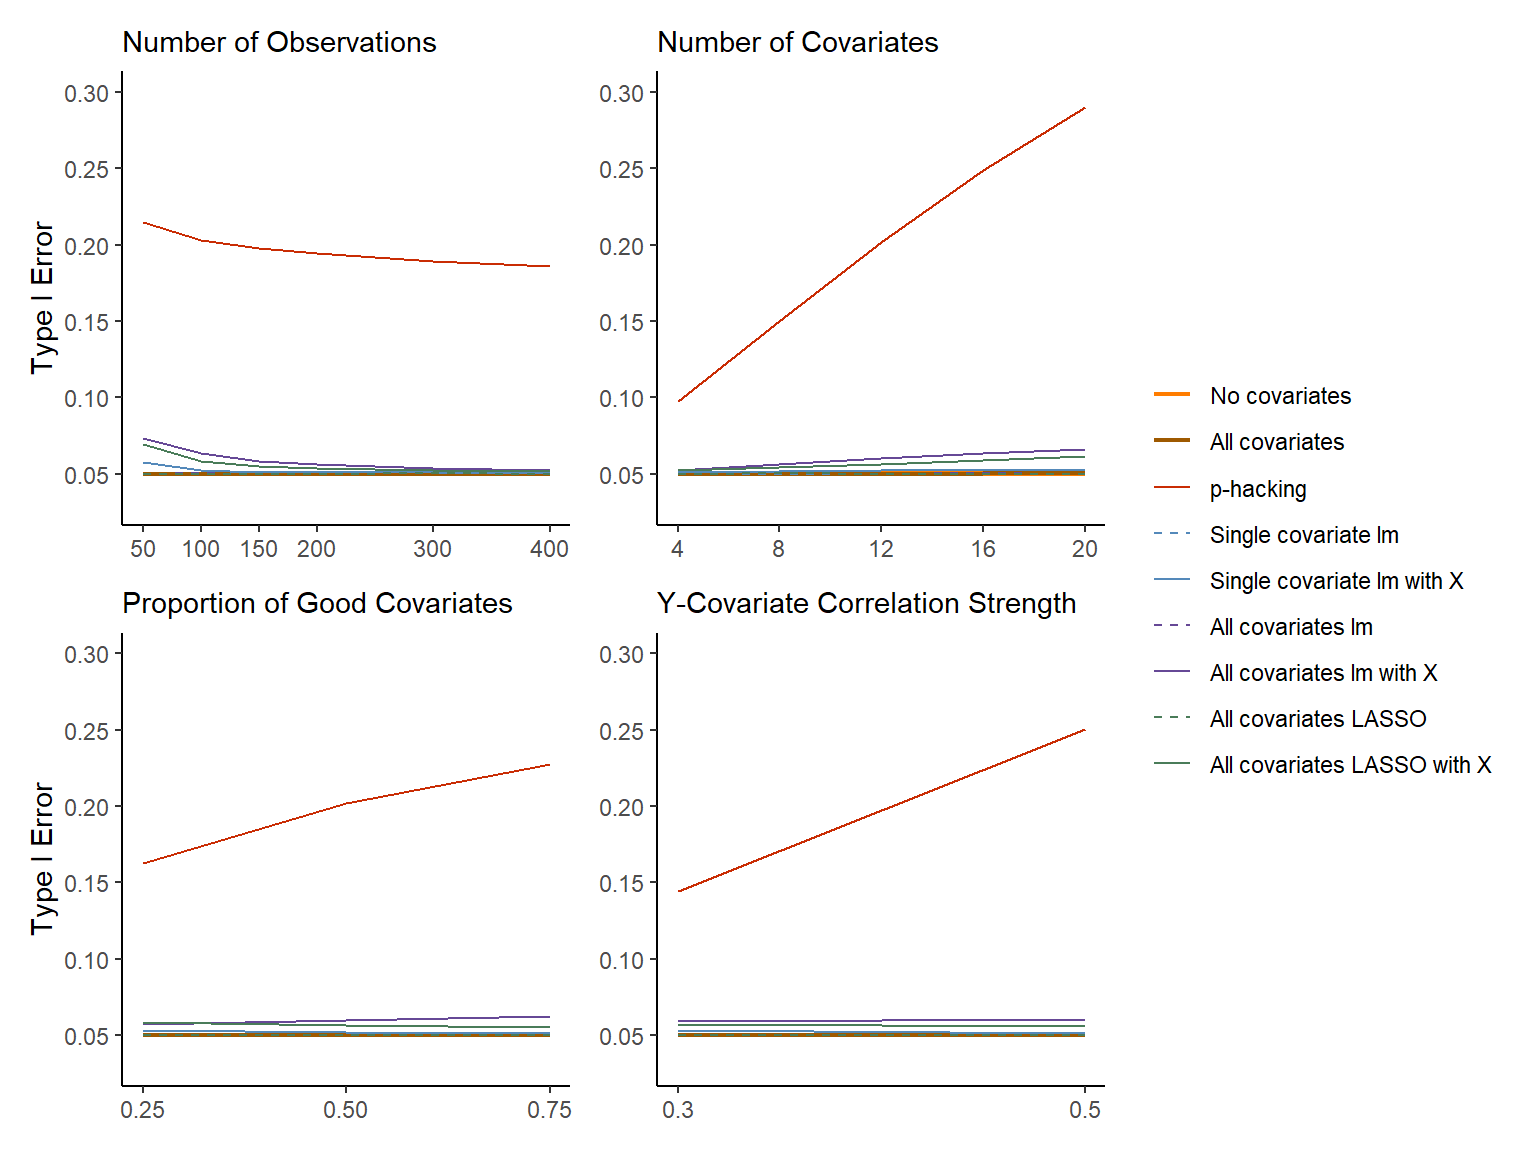

In [ ]:

(observations + covs)/(good_covs + ycor) +
  plot_layout(guides = "collect") &
  theme(legend.position = "right")


In [ ]:
rm(d_0)


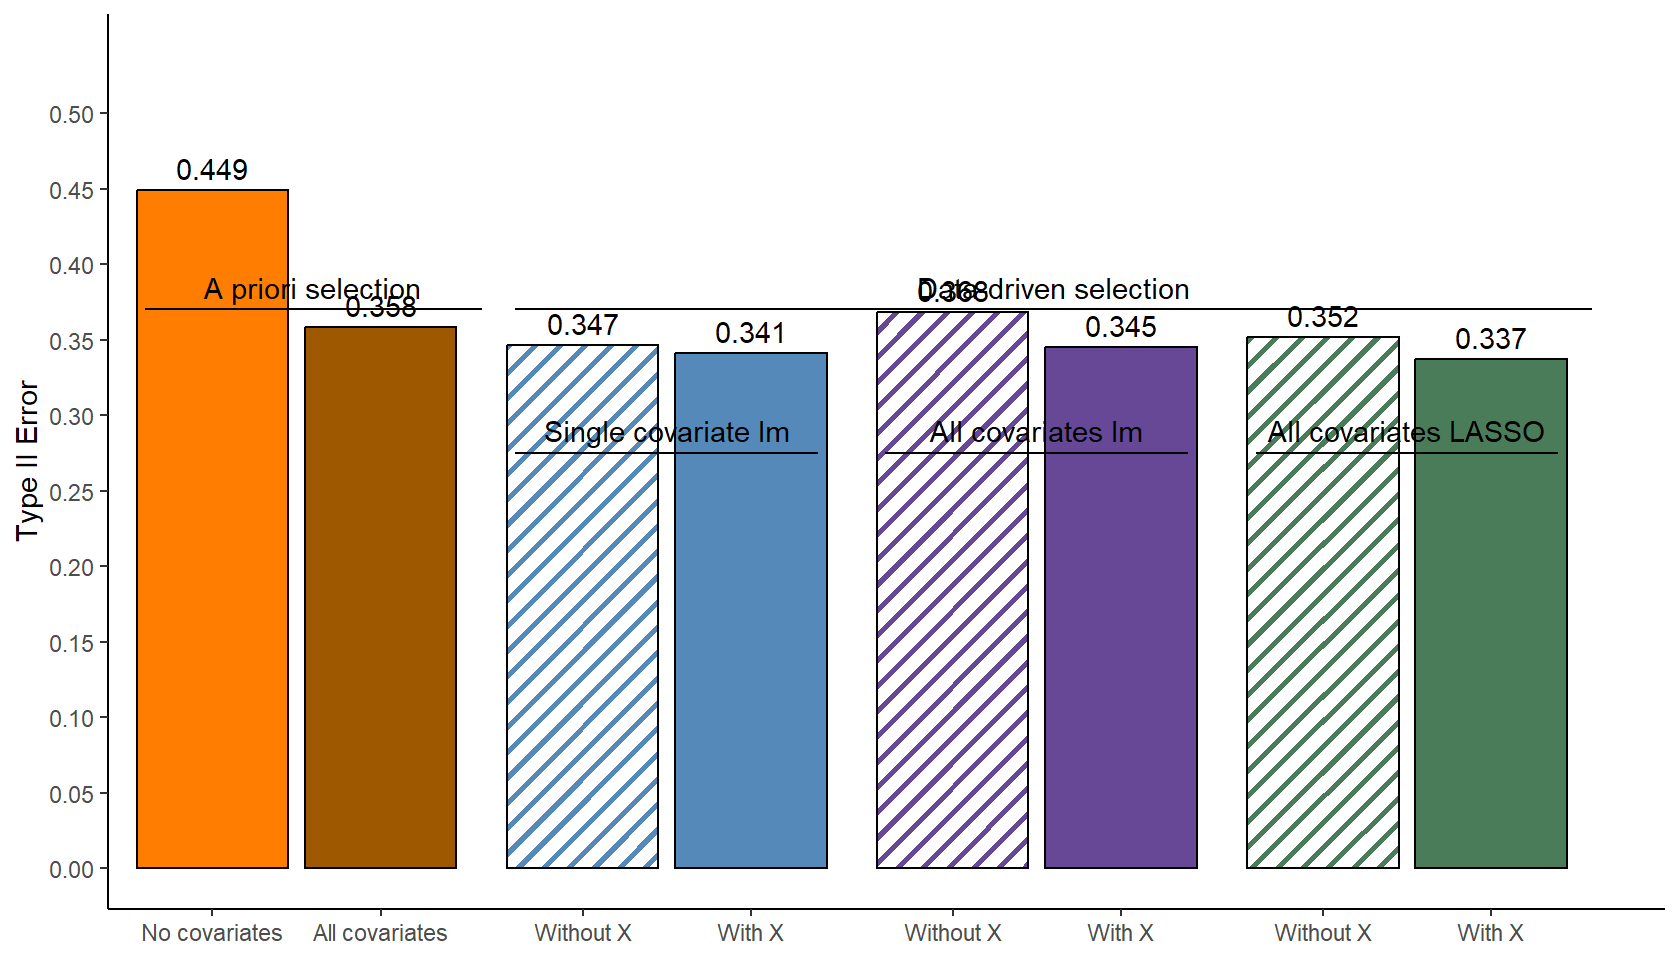

In [ ]:

d_02 <- rbind(d_02, d_05)

rm(d_05)

d_all <- d_02 |>
  filter(method != "p-hacking")

rm(d_02)

type_II_summary <- d_all |> 
  group_by(method) |>
  summarise(type_II = mean(p_value >= 0.05))

# ---- Parameters
gap_after_idx <- c(2, 4, 6)  
gap_size <- 0.2                
bar_width <- 0.9                


df <- type_II_summary |>
  mutate(method_chr = as.character(method))


n <- nrow(df)
base_pos <- seq_len(n)  

# compute how many gaps precede each bar
gap_count_before <- sapply(base_pos, function(i) sum(gap_after_idx < i))
# add the total gap length before each bar
x_pos <- base_pos + gap_count_before * gap_size

plot_df <- df |>
  mutate(x_pos = x_pos)


x_breaks <- plot_df$x_pos
x_labels <- c("No covariates", "All covariates",
              "Without X", "With X",
              "Without X", "With X",
              "Without X", "With X")

segment_labels <- tibble::tibble(
  x = c(mean(c(0.6, 2.6)),
        mean(c(2.8, 9.2)),
        mean(c(2.8, 4.6)),
        mean(c(5, 6.8)),
        mean(c(7.2, 9))),
  y = c(.37, .37, .275, .275, .275) + 0.015,   
  label = c("A priori selection", "Data-driven selection", "Single covariate lm", "All covariates lm", "All covariates LASSO")
)


ggplot(
  plot_df,
  aes(x = x_pos, y = type_II, fill = method, pattern = method)
) +
   geom_bar_pattern(
    stat = "identity",
    width = bar_width,
    pattern_colour = "white",
    pattern_fill = "white",
    pattern_angle = 45,
    pattern_density = 0.6,
    pattern_spacing = 0.02,
    color = "black"
  ) +
  geom_segment(aes(y = .37, x = .6, xend = 2.6)) +
  geom_segment(aes(y = .37, x = 2.8, xend = 9.2)) +
  geom_segment(aes(y = .275, x = 2.8, xend = 4.6)) +
  geom_segment(aes(y = .275, x = 5, xend = 6.8)) +
  geom_segment(aes(y = .275, x = 7.2, xend = 9)) +
  geom_text(
    aes(label = sprintf("%.3f", type_II)),
    vjust = -0.5
  ) +
  geom_text(
    data = segment_labels,
    aes(x = x, y = y, label = label),
    inherit.aes = FALSE
  ) +
  labs(x = NULL, y = "Type II Error") +
  scale_y_continuous(
    limits = c(0, max(type_II_summary$type_II) * 1.2),
    breaks = seq(0, max(type_II_summary$type_II) * 1.2, by = 0.05)
  ) +
  # numeric x with custom breaks/labels; gaps are just extra space between positions
  scale_x_continuous(
    breaks = x_breaks,
    labels = x_labels,
    expand = expansion(mult = c(0.02, 0.05))  # trim extra margin if you like
  ) +
  scale_pattern_manual(values = method_patterns) +
  scale_fill_manual(values = method_colors) +
  theme(
    legend.position = "none"
  )


In [ ]:
observations_2 <- d_all |> 
  group_by(method, n_obs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_not_sig, color = method, linetype = method, linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50, .60, .70 ),
                    limits = c(0.02, .72)) +
  labs(y = "Type II Error",
       subtitle = "Number of Observations",
       x = NULL) +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())

covs_2 <- d_all |> 
  group_by(method, n_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_not_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40),
                    limits = c(0.02, .42)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Number of Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())

good_covs_2 <- d_all |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_not_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40 ),
                    limits = c(0.02, .42)) +
  labs(y = "Type II Error",
       x = NULL,
       subtitle = "Proportion of Good Covariates") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank())

ycor_2 <- d_all |> 
  group_by(method, r_ycov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_not_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.2, 0.5)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40),
                    limits = c(0.02, .42)) +
  labs(y = NULL,
       x = NULL,
       subtitle = "Y-Covariate Correlation Strength") +
  scale_linetype_manual(values = method_linetypes) +
  scale_linewidth_manual(values = method_linewidths) +
  scale_color_manual(values = method_colors) +
  theme(legend.title = element_blank())

b_x <- d_all |> 
  group_by(method, b_x) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = b_x, y = prop_not_sig, color = method, linetype = method,
             linewidth = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.2, 0.5)) +
  scale_y_continuous(breaks = c(0.10, 0.20, .30, .40, .50),
                    limits = c(0.02, .52)) +
  labs(y = "Type II Error",
       x = NULL,
       subtitle = "Population Parameter for X") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors) +
  scale_linewidth_manual(values = method_linewidths) +
  theme(legend.title = element_blank(),
        legend.position = "none")


(`geom_line()`).

(`geom_line()`).

(`geom_line()`).

(`geom_line()`).

(`geom_line()`).

`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?

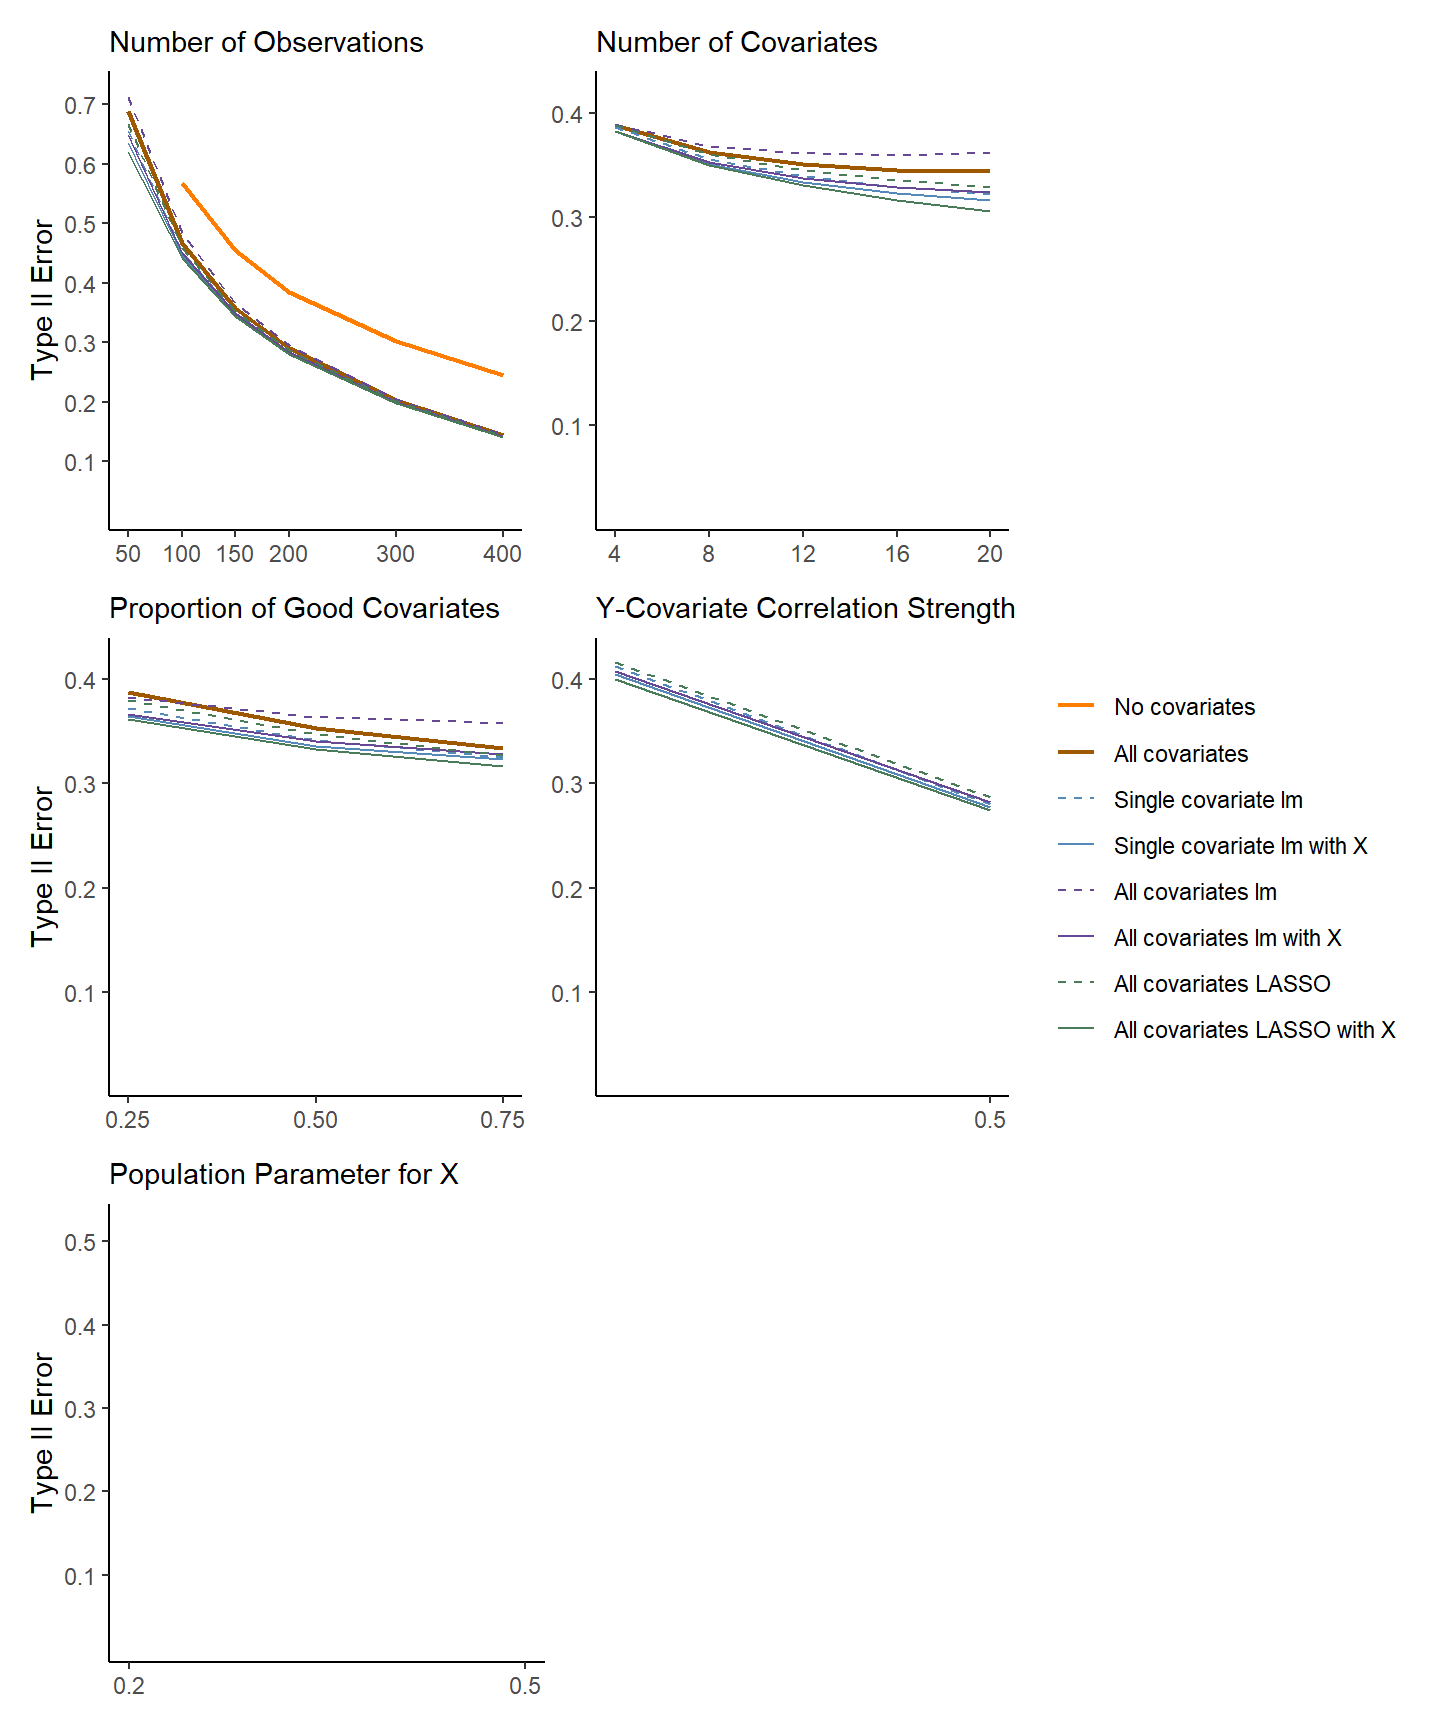

In [ ]:

(observations_2 + covs_2)/(good_covs_2 + ycor_2)/(b_x + plot_spacer()) +
  plot_layout(guides = "collect") &
  theme(legend.position = "right")
